In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/SMM4H 2024/SMM4H-2024-Task5-Training.tsv', sep='\t')
df_dev = pd.read_csv('/content/drive/MyDrive/SMM4H 2024/SMM4H-2024-Task5-Validation.tsv', sep='\t')

In [3]:
!pip install transformers seqeval torch tqdm accelerate sentencepiece datasets

In [4]:
df_train

tweet_id                                               text  \
0     1364778927105933315  Psych Med Twitter, wondering if you can help. ...   
1     1130719434526511104  @dmx_biographer @HellaChillAF I wouldn‚Äôt fuck ...   
2     1184221813733253120  Harley is autistic.... she has the mental capa...   
3     1435958387020341248  I just made my son cry before going to school ...   
4     1112559025927999488  Yooooooo my dad really just said ‚ÄúI‚Äôd rather h...   
...                   ...                                                ...   
7393  1232778727186223108  Just got all kinds of dirty looks for ordering...   
7394  1174782065532780544  anyways- if they did cause autism, i‚Äôd rather ...   
7395  1052612940438728704  2/4 trouble at work and I could have lost my j...   
7396  1243556662964862976  @LawyerChamber $LgiLder22 I have severe asthma...   
7397  1011262796212985856  Of course there‚Äôs times I‚Äôve been so frustrate...   

      label  
0         0  
1         0  
2         1  
3         1  
4         0  
...     ...  
7393      1  
7394      0  
7395      0  
7396      1  
7397      1  

[7398 rows x 3 columns]

In [5]:
df_dev

tweet_id                                               text  \
0    1265323726570225669  Mom Finds Secret to Homeschooling her Autistic...   
1    1254180961622900738  I hope our child has my calmness and NOT Andre...   
2     800336385399885824  Blind Girl With Autism Mimics Whitney Houston ...   
3    1107948318150152192  @amyschumer watching #growing, my 2yo son has ...   
4    1438320313511473154  @robbystarbuck @AmericanAir would rather a mot...   
..                   ...                                                ...   
384  1479160193808273413  my 7yo is being tested for adhd and struggles ...   
385  1084086161667252225  @attachedmrsL the first reply on the tweet tho...   
386  1404612356819374080  There's a mom who recorded her autistic son &a...   
387  1458807608052174856  @itsadollthxng Lmfao girl !!! I‚Äôm upset fr cau...   
388  1299153969009184768  @aaronraidersfan @DeusYeet64 @Struggforreal @f...   

     label  
0        0  
1        0  
2        0  
3        1  
4        0  
..     ...  
384      0  
385      0  
386      0  
387      1  
388      1  

[389 rows x 3 columns]

In [6]:
for df in [df_train, df_dev]:
    df['text'] = df['text'].str.replace(r'http\S+|www.\S+', '', case=False)
    df['text'] = df['text'].str.replace(r'@\S+|#\S+', '')
    df['text'] = df['text'].str.replace(r'\s+', ' ', case=False)

<ipython-input-6-7c82a75b64f0>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'http\S+|www.\S+', '', case=False)
<ipython-input-6-7c82a75b64f0>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'@\S+|#\S+', '')
<ipython-input-6-7c82a75b64f0>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'\s+', ' ', case=False)


In [7]:
df_train

tweet_id                                               text  \
0     1364778927105933315  Psych Med Twitter, wondering if you can help. ...   
1     1130719434526511104   I wouldn‚Äôt fuck rob with YOUR dick. He‚Äôs an a...   
2     1184221813733253120  Harley is autistic.... she has the mental capa...   
3     1435958387020341248  I just made my son cry before going to school ...   
4     1112559025927999488  Yooooooo my dad really just said ‚ÄúI‚Äôd rather h...   
...                   ...                                                ...   
7393  1232778727186223108  Just got all kinds of dirty looks for ordering...   
7394  1174782065532780544  anyways- if they did cause autism, i‚Äôd rather ...   
7395  1052612940438728704  2/4 trouble at work and I could have lost my j...   
7396  1243556662964862976   $LgiLder22 I have severe asthma and my oldest...   
7397  1011262796212985856  Of course there‚Äôs times I‚Äôve been so frustrate...   

      label  
0         0  
1         0  
2         1  
3         1  
4         0  
...     ...  
7393      1  
7394      0  
7395      0  
7396      1  
7397      1  

[7398 rows x 3 columns]

In [8]:
df_dev

tweet_id                                               text  \
0    1265323726570225669  Mom Finds Secret to Homeschooling her Autistic...   
1    1254180961622900738  I hope our child has my calmness and NOT Andre...   
2     800336385399885824  Blind Girl With Autism Mimics Whitney Houston ...   
3    1107948318150152192   watching my 2yo son has ASD, you just made me...   
4    1438320313511473154   would rather a mother suffocate an asthmatic ...   
..                   ...                                                ...   
384  1479160193808273413  my 7yo is being tested for adhd and struggles ...   
385  1084086161667252225   the first reply on the tweet though ü§£ yes, I ...   
386  1404612356819374080  There's a mom who recorded her autistic son &a...   
387  1458807608052174856   Lmfao girl !!! I‚Äôm upset fr cause jacelyn has...   
388  1299153969009184768   I have a child that faces more adversity than...   

     label  
0        0  
1        0  
2        0  
3        1  
4        0  
..     ...  
384      0  
385      0  
386      0  
387      1  
388      1  

[389 rows x 3 columns]

In [9]:
from datasets import load_metric
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, IntervalStrategy
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from accelerate import Accelerator
import numpy as np
import torch
import os
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)
texts = df_train['text'].tolist()
labels = df_train['label'].tolist()
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('microsoft/deberta-v3-large')
train_dataset = TextDataset(tokenizer, texts, labels)
training_args = TrainingArguments(
    seed = 185304009,
    output_dir='./results_temp',  # Temporarily save here
    num_train_epochs=20,  # Adjusted for demonstration
    learning_rate=2e-5,
    per_device_train_batch_size=20,
    per_device_eval_batch_size=20,
    warmup_steps=0,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    evaluation_strategy=IntervalStrategy.NO,
    save_strategy=IntervalStrategy.EPOCH,
    load_best_model_at_end=False,  # Ensure models are saved regardless of performance
)
class CustomTrainer(Trainer):
    def on_train_end(self, args, state, control, **kwargs):
        super().on_train_end(args, state, control, **kwargs)
        for epoch in range(1, int(training_args.num_train_epochs) + 1):
            epoch_dir = f"./roberta_model_{epoch}"
            os.rename(f"{training_args.output_dir}/checkpoint-{epoch}", epoch_dir)
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
)
trainer.train()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.


Checkpoint destination directory ./results_temp/checkpoint-370 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results_temp/checkpoint-740 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results_temp/checkpoint-1110 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results_temp/checkpoint-1480 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results_temp/checkpoint-1850 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results_temp/checkpoint-2220 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results_temp/checkpoint-2590 already exists and is non-empty.Saving

TrainOutput(global_step=7400, training_loss=0.04806167188810021, metrics={'train_runtime': 3670.0908, 'train_samples_per_second': 40.315, 'train_steps_per_second': 2.016, 'total_flos': 2.55849649671384e+16, 'train_loss': 0.04806167188810021, 'epoch': 20.0})

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

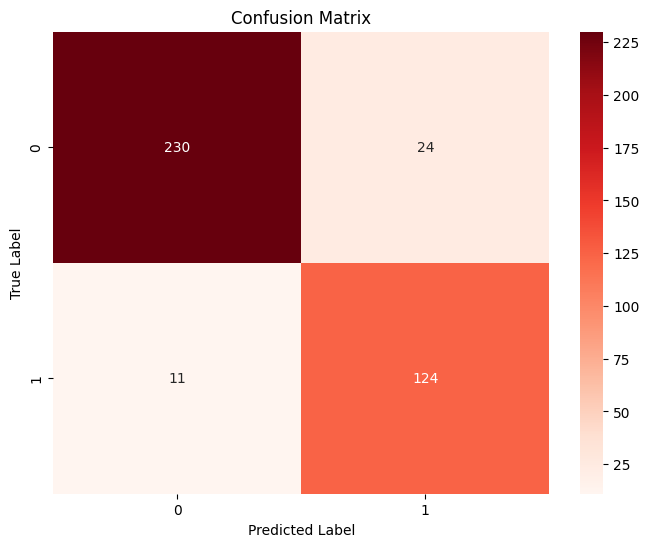

Accuracy: 0.910025706940874
F1 Score (Class 1): 0.8763250883392226
Recall (Macro): 0.9120151647710703
Precision (Macro): 0.8960973421554335


In [10]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-370')
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_1 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])
df_merged_1 = pd.concat([df_dev, df_predictions_1], axis=1)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_1['label']
predicted_labels = df_merged_1['predicted_label']
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_1.to_csv('debertav3L_task5_predictions_001_epoch_1.csv', index=False)

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

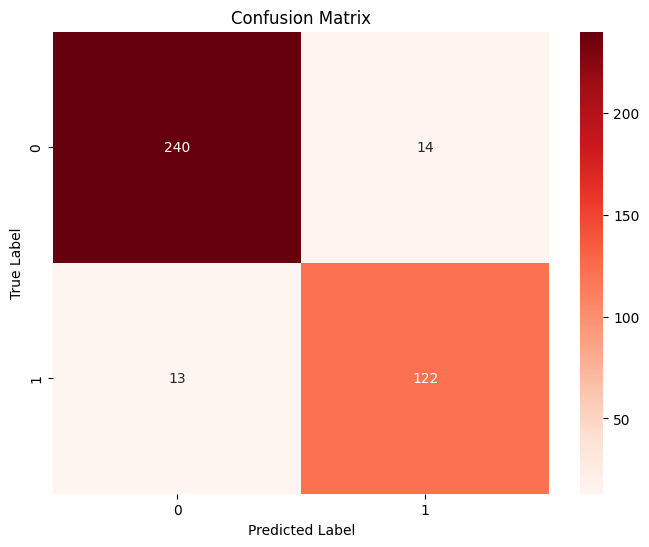

Accuracy: 0.9305912596401028
F1 Score (Class 1): 0.9003690036900369
Recall (Macro): 0.9242927967337415
Precision (Macro): 0.9228377121599628


In [11]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-740')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_2 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_2 = pd.concat([df_dev, df_predictions_2], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_2['label']                                                                                               # HERE
predicted_labels = df_merged_2['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_2.to_csv('debertav3L_task5_predictions_001_epoch_2.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

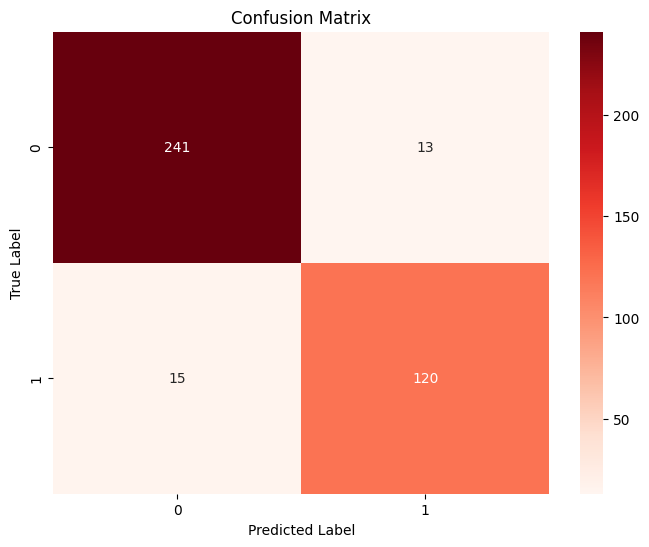

Accuracy: 0.9280205655526992
F1 Score (Class 1): 0.8955223880597015
Recall (Macro): 0.9188538932633421
Precision (Macro): 0.9218309445488722


In [12]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-1110')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_3 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_3 = pd.concat([df_dev, df_predictions_3], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_3['label']                                                                                               # HERE
predicted_labels = df_merged_3['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_3.to_csv('debertav3L_task5_predictions_001_epoch_3.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

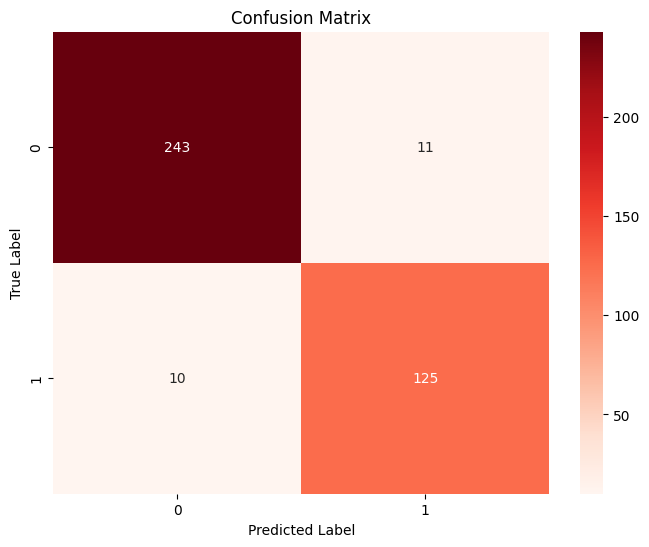

Accuracy: 0.9460154241645244
F1 Score (Class 1): 0.922509225092251
Recall (Macro): 0.9413094196558763
Precision (Macro): 0.9397959776796094


In [13]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-1480')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_4 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_4 = pd.concat([df_dev, df_predictions_4], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_4['label']                                                                                               # HERE
predicted_labels = df_merged_4['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_4.to_csv('debertav3L_task5_predictions_001_epoch_4.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

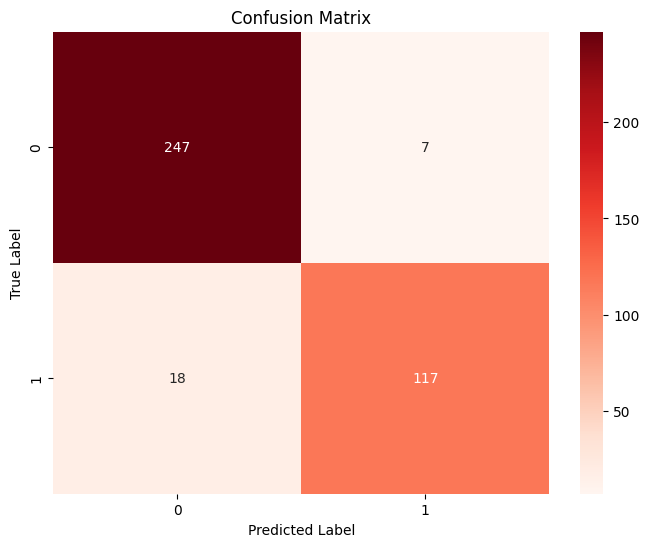

Accuracy: 0.9357326478149101
F1 Score (Class 1): 0.9034749034749036
Recall (Macro): 0.9195538057742783
Precision (Macro): 0.9378119293974437


In [14]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-1850')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_5 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_5 = pd.concat([df_dev, df_predictions_5], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_5['label']                                                                                               # HERE
predicted_labels = df_merged_5['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_5.to_csv('debertav3L_task5_predictions_001_epoch_5.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

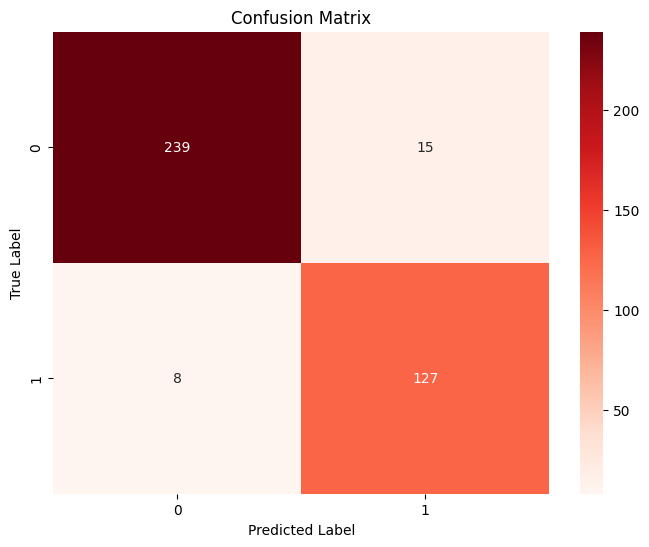

Accuracy: 0.9408740359897172
F1 Score (Class 1): 0.9169675090252708
Recall (Macro): 0.9408428113152523
Precision (Macro): 0.9309887666077437


In [15]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-2220')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_6 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_6 = pd.concat([df_dev, df_predictions_6], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_6['label']                                                                                               # HERE
predicted_labels = df_merged_6['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_6.to_csv('debertav3L_task5_predictions_001_epoch_6.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

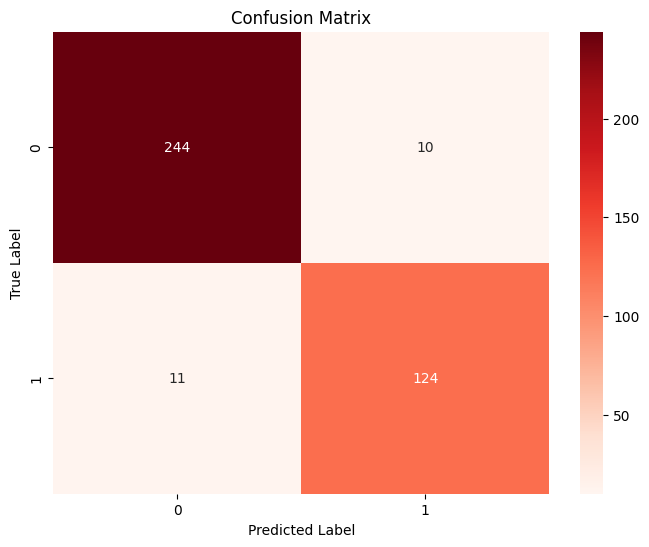

Accuracy: 0.9460154241645244
F1 Score (Class 1): 0.9219330855018587
Recall (Macro): 0.9395742198891806
Precision (Macro): 0.9411179397131988


In [16]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-2590')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_7 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_7 = pd.concat([df_dev, df_predictions_7], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_7['label']                                                                                               # HERE
predicted_labels = df_merged_7['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_7.to_csv('debertav3L_task5_predictions_001_epoch_7.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

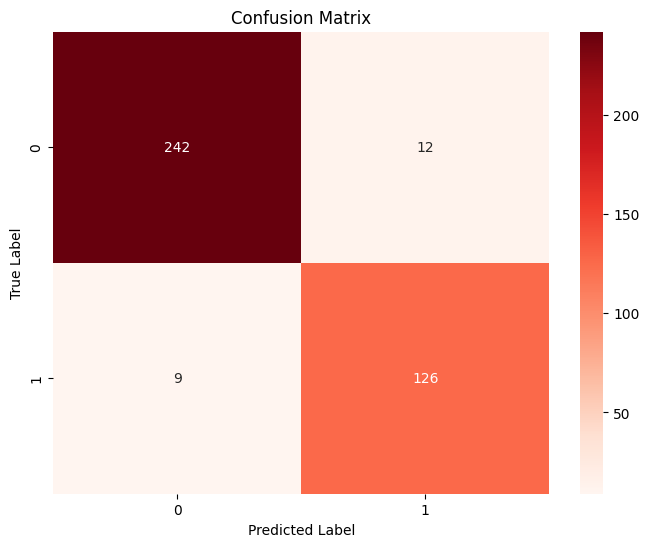

Accuracy: 0.9460154241645244
F1 Score (Class 1): 0.9230769230769231
Recall (Macro): 0.9430446194225721
Precision (Macro): 0.9385934522778452


In [17]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-2960')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_8 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_8 = pd.concat([df_dev, df_predictions_8], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_8['label']                                                                                               # HERE
predicted_labels = df_merged_8['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_8.to_csv('debertav3L_task5_predictions_001_epoch_8.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

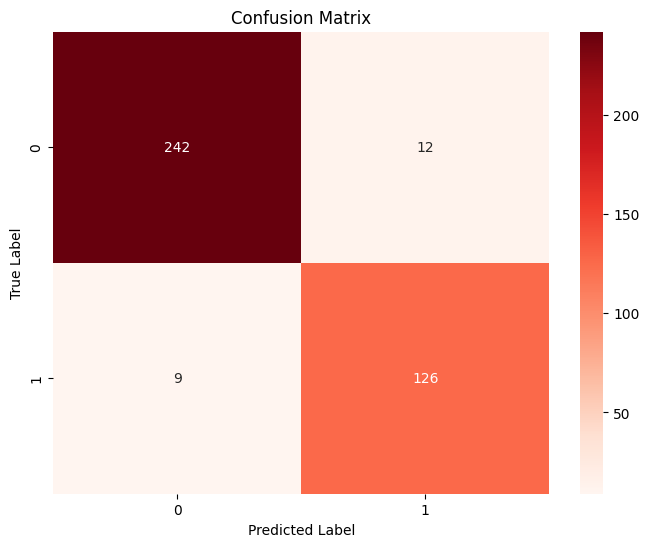

Accuracy: 0.9460154241645244
F1 Score (Class 1): 0.9230769230769231
Recall (Macro): 0.9430446194225721
Precision (Macro): 0.9385934522778452


In [18]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-3330')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_9 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_9 = pd.concat([df_dev, df_predictions_9], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_9['label']                                                                                               # HERE
predicted_labels = df_merged_9['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_9.to_csv('debertav3L_task5_predictions_001_epoch_9.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

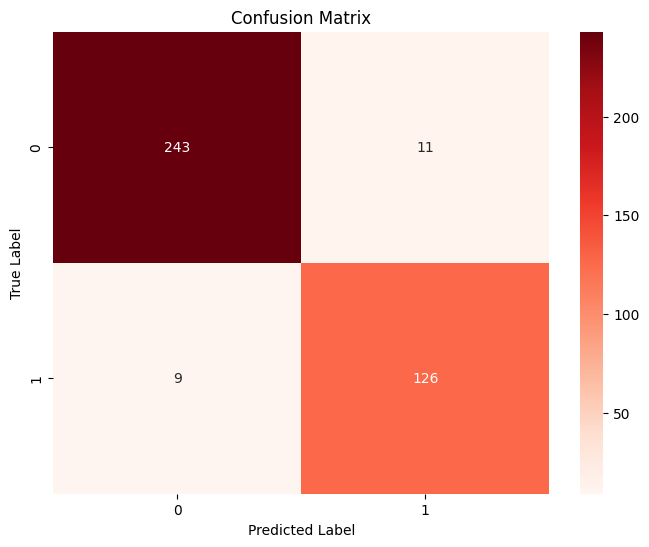

Accuracy: 0.9485861182519281
F1 Score (Class 1): 0.926470588235294
Recall (Macro): 0.94501312335958
Precision (Macro): 0.9419968717413973


In [19]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-3700')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_10 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_10 = pd.concat([df_dev, df_predictions_10], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_10['label']                                                                                               # HERE
predicted_labels = df_merged_10['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_10.to_csv('debertav3L_task5_predictions_001_epoch_10.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

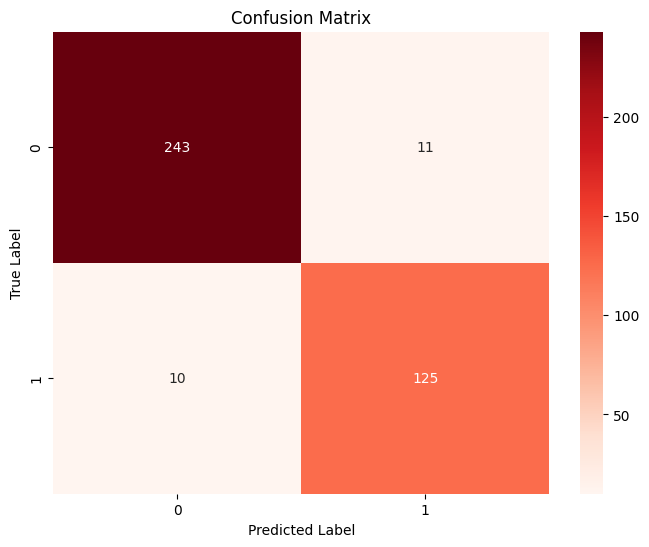

Accuracy: 0.9460154241645244
F1 Score (Class 1): 0.922509225092251
Recall (Macro): 0.9413094196558763
Precision (Macro): 0.9397959776796094


In [20]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-4070')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_11 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_11 = pd.concat([df_dev, df_predictions_11], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_11['label']                                                                                               # HERE
predicted_labels = df_merged_11['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_11.to_csv('debertav3L_task5_predictions_001_epoch_11.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

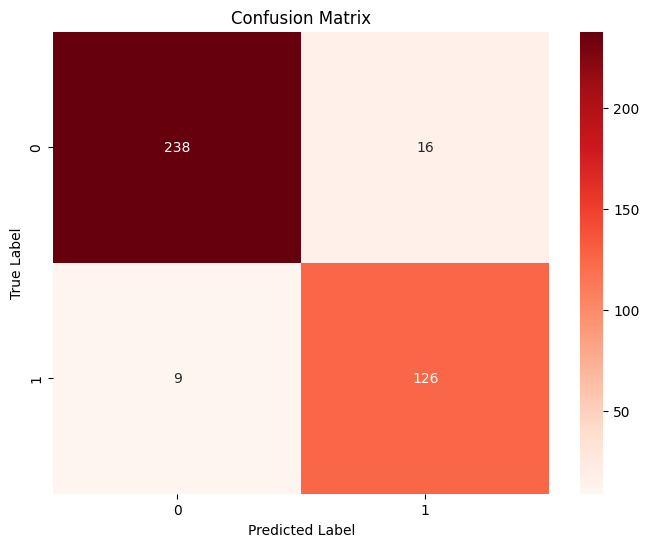

Accuracy: 0.9357326478149101
F1 Score (Class 1): 0.9097472924187726
Recall (Macro): 0.9351706036745406
Precision (Macro): 0.9254433483492046


In [21]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-4440')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_12 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_12 = pd.concat([df_dev, df_predictions_12], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_12['label']                                                                                               # HERE
predicted_labels = df_merged_12['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_12.to_csv('debertav3L_task5_predictions_001_epoch_12.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

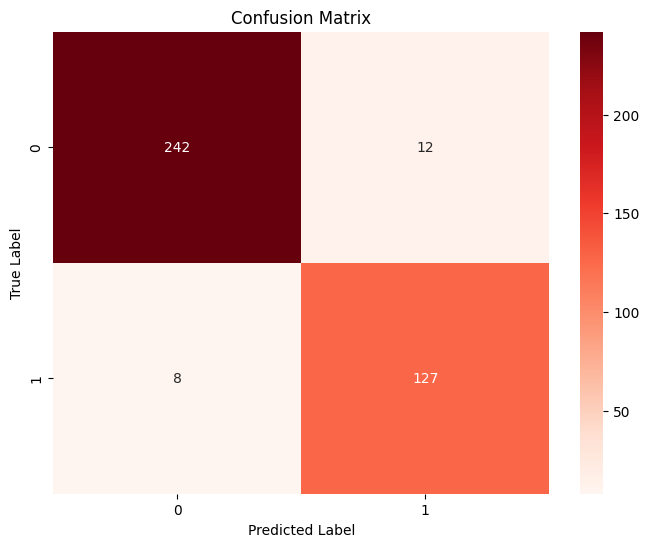

Accuracy: 0.9485861182519281
F1 Score (Class 1): 0.927007299270073
Recall (Macro): 0.9467483231262759
Precision (Macro): 0.9408345323741008


In [22]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-4810')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_13 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_13 = pd.concat([df_dev, df_predictions_13], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_13['label']                                                                                               # HERE
predicted_labels = df_merged_13['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_13.to_csv('debertav3L_task5_predictions_001_epoch_13.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

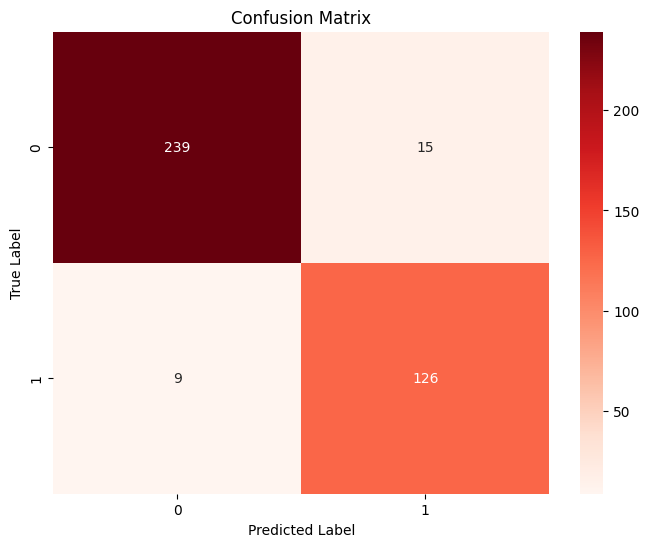

Accuracy: 0.9383033419023136
F1 Score (Class 1): 0.9130434782608695
Recall (Macro): 0.9371391076115485
Precision (Macro): 0.9286633493479752


In [23]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-5180')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_14 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_14 = pd.concat([df_dev, df_predictions_14], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_14['label']                                                                                               # HERE
predicted_labels = df_merged_14['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_14.to_csv('debertav3L_task5_predictions_001_epoch_14.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

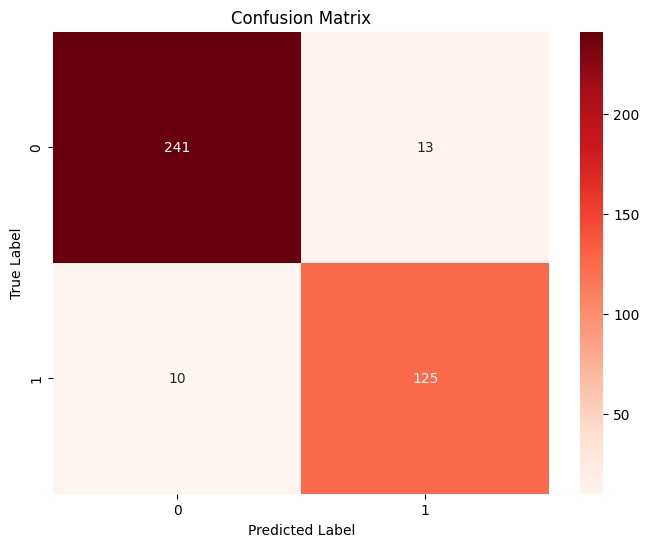

Accuracy: 0.9408740359897172
F1 Score (Class 1): 0.9157509157509157
Recall (Macro): 0.9373724117818606
Precision (Macro): 0.9329782319995381


In [24]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-5550')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_15 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_15 = pd.concat([df_dev, df_predictions_15], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_15['label']                                                                                               # HERE
predicted_labels = df_merged_15['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_15.to_csv('debertav3L_task5_predictions_001_epoch_15.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

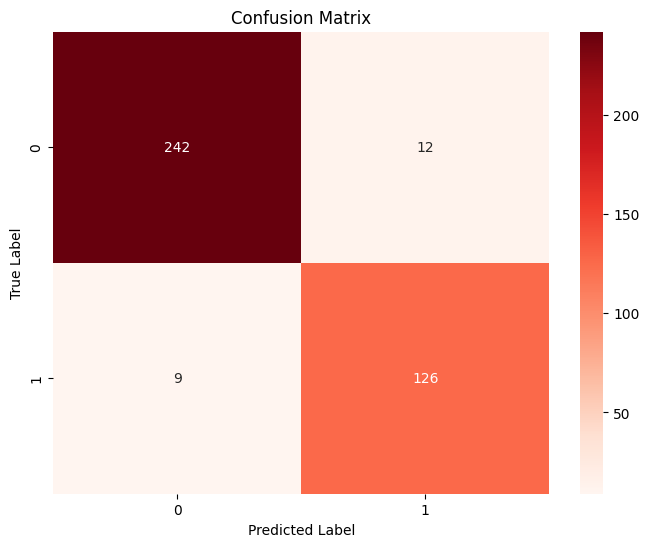

Accuracy: 0.9460154241645244
F1 Score (Class 1): 0.9230769230769231
Recall (Macro): 0.9430446194225721
Precision (Macro): 0.9385934522778452


In [25]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-5920')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_16 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_16 = pd.concat([df_dev, df_predictions_16], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_16['label']                                                                                               # HERE
predicted_labels = df_merged_16['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_16.to_csv('debertav3L_task5_predictions_001_epoch_16.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

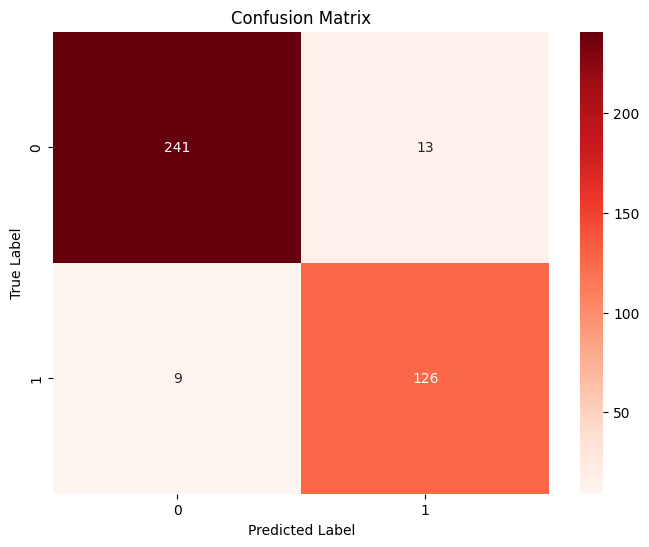

Accuracy: 0.9434447300771208
F1 Score (Class 1): 0.9197080291970804
Recall (Macro): 0.9410761154855642
Precision (Macro): 0.9352374100719425


In [26]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-6290')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_17 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_17 = pd.concat([df_dev, df_predictions_17], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_17['label']                                                                                               # HERE
predicted_labels = df_merged_17['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_17.to_csv('debertav3L_task5_predictions_001_epoch_17.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

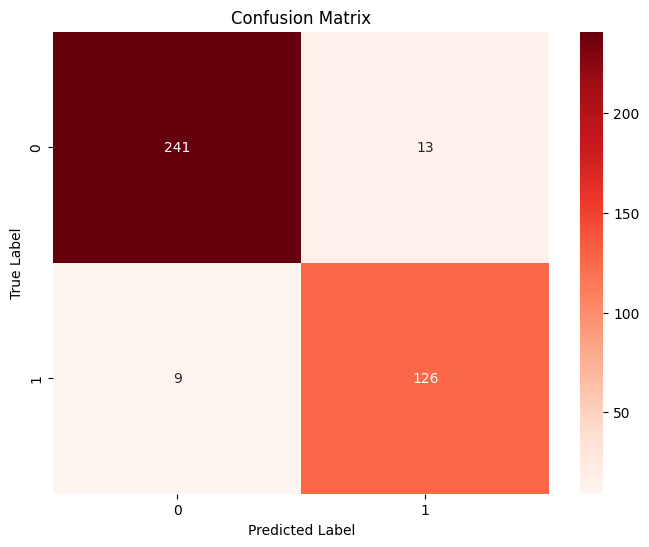

Accuracy: 0.9434447300771208
F1 Score (Class 1): 0.9197080291970804
Recall (Macro): 0.9410761154855642
Precision (Macro): 0.9352374100719425


In [28]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-6660')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_18 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_18 = pd.concat([df_dev, df_predictions_18], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_18['label']                                                                                               # HERE
predicted_labels = df_merged_18['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_18.to_csv('debertav3L_task5_predictions_001_epoch_18.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

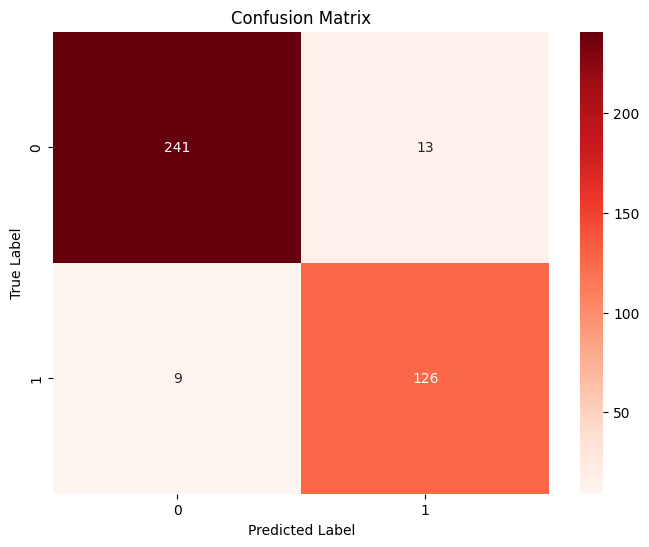

Accuracy: 0.9434447300771208
F1 Score (Class 1): 0.9197080291970804
Recall (Macro): 0.9410761154855642
Precision (Macro): 0.9352374100719425


In [29]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-7030')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_19 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_19 = pd.concat([df_dev, df_predictions_19], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_19['label']                                                                                               # HERE
predicted_labels = df_merged_19['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_19.to_csv('debertav3L_task5_predictions_001_epoch_19.csv', index=False)                                                          # HERE  # HERE

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

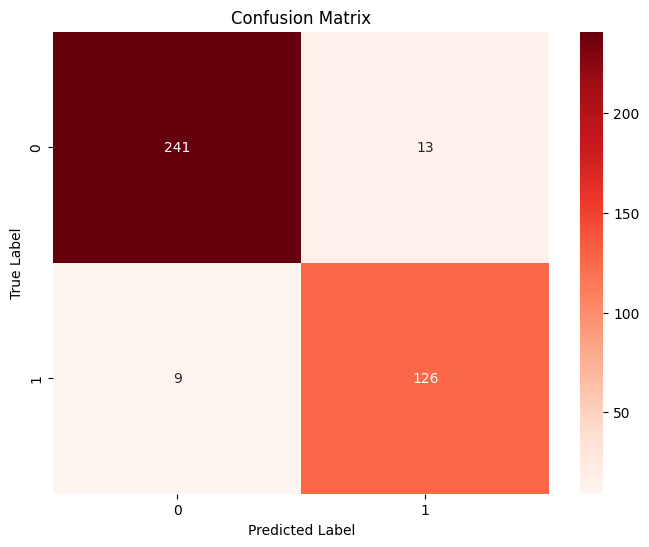

Accuracy: 0.9434447300771208
F1 Score (Class 1): 0.9197080291970804
Recall (Macro): 0.9410761154855642
Precision (Macro): 0.9352374100719425


In [30]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-7400')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_20 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_20 = pd.concat([df_dev, df_predictions_20], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_20['label']                                                                                               # HERE
predicted_labels = df_merged_20['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_20.to_csv('debertav3L_task5_predictions_001_epoch_20.csv', index=False)                                                          # HERE  # HERE

In [31]:
df_gpt = pd.read_csv('/content/GPT4_Task5_001_Dev_preds.csv')
df_gpt

tweet_id                                               text  \
0    1265323726570225669  Mom Finds Secret to Homeschooling her Autistic...   
1    1254180961622900738  I hope our child has my calmness and NOT Andre...   
2     800336385399885824  Blind Girl With Autism Mimics Whitney Houston ...   
3    1107948318150152192  @amyschumer watching #growing, my 2yo son has ...   
4    1438320313511473154  @robbystarbuck @AmericanAir would rather a mot...   
..                   ...                                                ...   
384  1479160193808273413  my 7yo is being tested for adhd and struggles ...   
385  1084086161667252225  @attachedmrsL the first reply on the tweet tho...   
386  1404612356819374080  There's a mom who recorded her autistic son &a...   
387  1458807608052174856  @itsadollthxng Lmfao girl !!! I‚Äôm upset fr cau...   
388  1299153969009184768  @aaronraidersfan @DeusYeet64 @Struggforreal @f...   

     label  pred  
0        0     0  
1        0     1  
2        0     0  
3        1     1  
4        0     0  
..     ...   ...  
384      0     1  
385      0     0  
386      0     0  
387      1     1  
388      1     1  

[389 rows x 4 columns]

In [32]:
df_merged_20

tweet_id                                               text  \
0    1265323726570225669  Mom Finds Secret to Homeschooling her Autistic...   
1    1254180961622900738  I hope our child has my calmness and NOT Andre...   
2     800336385399885824  Blind Girl With Autism Mimics Whitney Houston ...   
3    1107948318150152192   watching my 2yo son has ASD, you just made me...   
4    1438320313511473154   would rather a mother suffocate an asthmatic ...   
..                   ...                                                ...   
384  1479160193808273413  my 7yo is being tested for adhd and struggles ...   
385  1084086161667252225   the first reply on the tweet though ü§£ yes, I ...   
386  1404612356819374080  There's a mom who recorded her autistic son &a...   
387  1458807608052174856   Lmfao girl !!! I‚Äôm upset fr cause jacelyn has...   
388  1299153969009184768   I have a child that faces more adversity than...   

     label  predicted_label  prediction_0_weight  prediction_1_weight  
0        0                0             0.999993             0.000007  
1        0                0             0.999993             0.000007  
2        0                0             0.999993             0.000007  
3        1                1             0.000004             0.999996  
4        0                0             0.999993             0.000007  
..     ...              ...                  ...                  ...  
384      0                0             0.999993             0.000007  
385      0                0             0.999993             0.000007  
386      0                0             0.999993             0.000007  
387      1                1             0.000003             0.999997  
388      1                1             0.000004             0.999996  

[389 rows x 6 columns]

In [33]:
df_gpt4_20 = df_merged_20.join(df_gpt.iloc[:, -1].rename('pred_gpt4'))
df_gpt4_20

tweet_id                                               text  \
0    1265323726570225669  Mom Finds Secret to Homeschooling her Autistic...   
1    1254180961622900738  I hope our child has my calmness and NOT Andre...   
2     800336385399885824  Blind Girl With Autism Mimics Whitney Houston ...   
3    1107948318150152192   watching my 2yo son has ASD, you just made me...   
4    1438320313511473154   would rather a mother suffocate an asthmatic ...   
..                   ...                                                ...   
384  1479160193808273413  my 7yo is being tested for adhd and struggles ...   
385  1084086161667252225   the first reply on the tweet though ü§£ yes, I ...   
386  1404612356819374080  There's a mom who recorded her autistic son &a...   
387  1458807608052174856   Lmfao girl !!! I‚Äôm upset fr cause jacelyn has...   
388  1299153969009184768   I have a child that faces more adversity than...   

     label  predicted_label  prediction_0_weight  prediction_1_weight  \
0        0                0             0.999993             0.000007   
1        0                0             0.999993             0.000007   
2        0                0             0.999993             0.000007   
3        1                1             0.000004             0.999996   
4        0                0             0.999993             0.000007   
..     ...              ...                  ...                  ...   
384      0                0             0.999993             0.000007   
385      0                0             0.999993             0.000007   
386      0                0             0.999993             0.000007   
387      1                1             0.000003             0.999997   
388      1                1             0.000004             0.999996   

     pred_gpt4  
0            0  
1            1  
2            0  
3            1  
4            0  
..         ...  
384          1  
385          0  
386          0  
387          1  
388          1  

[389 rows x 7 columns]

In [34]:
df_view = df_gpt4_20[['tweet_id', 'label', 'predicted_label', 'pred_gpt4']]
df_view

tweet_id  label  predicted_label  pred_gpt4
0    1265323726570225669      0                0          0
1    1254180961622900738      0                0          1
2     800336385399885824      0                0          0
3    1107948318150152192      1                1          1
4    1438320313511473154      0                0          0
..                   ...    ...              ...        ...
384  1479160193808273413      0                0          1
385  1084086161667252225      0                0          0
386  1404612356819374080      0                0          0
387  1458807608052174856      1                1          1
388  1299153969009184768      1                1          1

[389 rows x 4 columns]

In [35]:
df_view_0 = df_view[df_view['pred_gpt4'] == 0]
df_view_1 = df_view[df_view['pred_gpt4'] == 1]

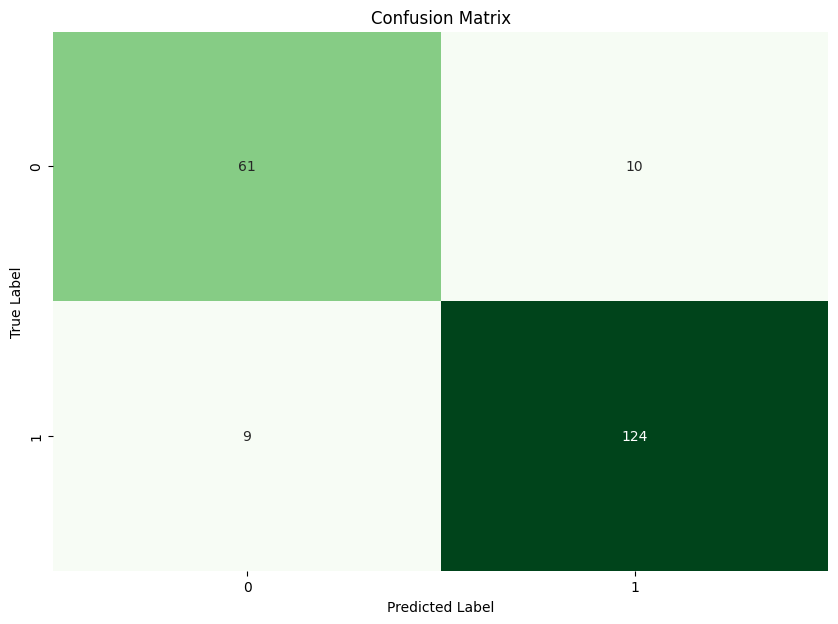

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(df_view_1['label'], df_view_1['predicted_label'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

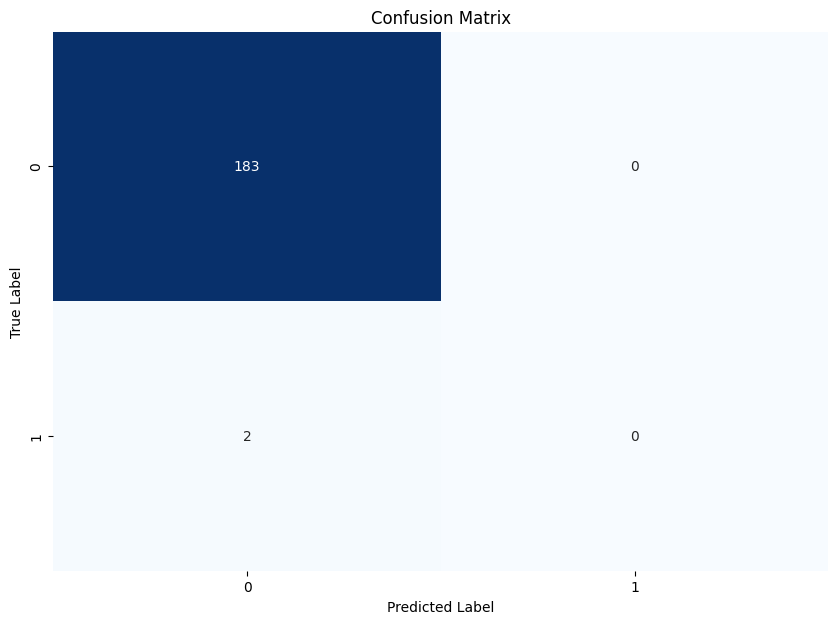

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(df_view_0['label'], df_view_0['pred_gpt4'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [38]:
import numpy as np
df_view['final_pred'] = np.where(df_view['pred_gpt4'] == 0, 0, df_view['predicted_label'])
df_view

<ipython-input-38-89ff39692ef4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_view['final_pred'] = np.where(df_view['pred_gpt4'] == 0, 0, df_view['predicted_label'])


tweet_id  label  predicted_label  pred_gpt4  final_pred
0    1265323726570225669      0                0          0           0
1    1254180961622900738      0                0          1           0
2     800336385399885824      0                0          0           0
3    1107948318150152192      1                1          1           1
4    1438320313511473154      0                0          0           0
..                   ...    ...              ...        ...         ...
384  1479160193808273413      0                0          1           0
385  1084086161667252225      0                0          0           0
386  1404612356819374080      0                0          0           0
387  1458807608052174856      1                1          1           1
388  1299153969009184768      1                1          1           1

[389 rows x 5 columns]

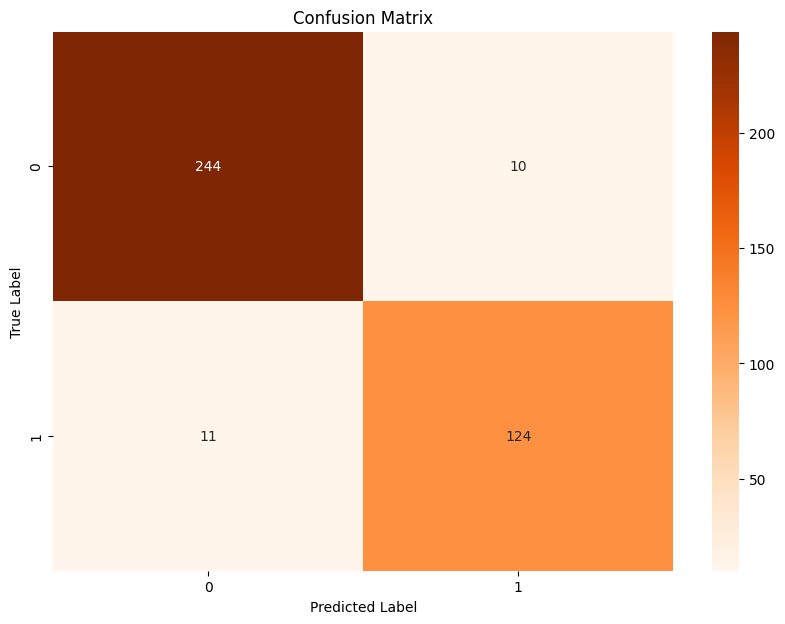

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(df_view['label'], df_view['final_pred'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [40]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
y_true = df_view['label']
y_pred = df_view['final_pred']
accuracy = accuracy_score(y_true, y_pred)
f1_class_1 = f1_score(y_true, y_pred, pos_label=1)
recall_macro = recall_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")

Accuracy: 0.9460154241645244
F1 Score (Class 1): 0.9219330855018587
Recall (Macro): 0.9395742198891806
Precision (Macro): 0.9411179397131988


In [41]:
df_view

tweet_id  label  predicted_label  pred_gpt4  final_pred
0    1265323726570225669      0                0          0           0
1    1254180961622900738      0                0          1           0
2     800336385399885824      0                0          0           0
3    1107948318150152192      1                1          1           1
4    1438320313511473154      0                0          0           0
..                   ...    ...              ...        ...         ...
384  1479160193808273413      0                0          1           0
385  1084086161667252225      0                0          0           0
386  1404612356819374080      0                0          0           0
387  1458807608052174856      1                1          1           1
388  1299153969009184768      1                1          1           1

[389 rows x 5 columns]

In [42]:
# prompt: Using dataframe df_view: df_view_2 = df_view [ label != predicted_label ]]
df_view_2 = df_view[df_view['label'] != df_view['predicted_label']]
df_view_2

tweet_id  label  predicted_label  pred_gpt4  final_pred
47   1306936371379142656      0                1          1           1
49   1167618379064233985      0                1          1           1
54   1420240266863075328      0                1          1           1
72    930101586386448385      1                0          1           0
76    992552152106127360      1                0          1           0
90   1487583290781491200      0                1          0           0
126  1385224892946255872      0                1          0           0
131  1210298245517389824      0                1          1           1
212   946571570868379648      0                1          1           1
213  1404021947109941254      1                0          1           0
227  1288597189409648640      1                0          1           0
232  1283822856707637248      0                1          1           1
241  1287235200129392640      0                1          0           0
253  1397565435285999617      1                0          1           0
254  1041857069807099904      1                0          1           0
277  1490962549898051584      0                1          1           1
282  1144977303937720327      1                0          1           0
287  1372616398053212176      0                1          1           1
322  1306615539494723584      1                0          1           0
349   996179580984614913      1                0          1           0
352  1087400184567554049      0                1          1           1
360   583818533915783168      0                1          1           1

In [43]:
df_gpt4_20_n = df_gpt4_20[df_gpt4_20['label'] != df_gpt4_20['predicted_label']]
df_gpt4_20_n

tweet_id                                               text  \
47   1306936371379142656  I'm black with an autistic son....Nah I'm good...   
49   1167618379064233985   Girl same! I‚Äôve been on vacation all week cau...   
54   1420240266863075328  Watching the assembly meeting and taking the n...   
72    930101586386448385   Very similar to the (Specific Carbohydrate Di...   
76    992552152106127360  thinking about my sweet boy as I was accepted ...   
90   1487583290781491200  The farm that I take Joshua to collects the en...   
126  1385224892946255872   AOS or OAS? I get OAS. Just keep an eye on it...   
131  1210298245517389824   Define ‚Äúsomething cool.‚Äù Does being a working...   
212   946571570868379648   I did shortly after my daughter's 2nd birthda...   
213  1404021947109941254  I knew ONE of my kids would get asthma ... It ...   
227  1288597189409648640   Yes exactly my thoughts üò§ I have a son and br...   
232  1283822856707637248  Next week is going to be crazy. Feeding therap...   
241  1287235200129392640           My son daddy drink that for his asthma üòÇ   
253  1397565435285999617  I don‚Äôt understand why Speech delay and Speech...   
254  1041857069807099904   my mom had cancer my son broke his leg the ot...   
277  1490962549898051584  Teaching your kid who has speech delay that th...   
282  1144977303937720327   Awe girl, I know there‚Äôs a struggle there. My...   
287  1372616398053212176   Yes this is normal, my daughter is turning 4 ...   
322  1306615539494723584  All I‚Äôm sayin is... if I could handle two non ...   
349   996179580984614913  Leo‚Äôs bitchass didn‚Äôt tell me he had asthma as...   
352  1087400184567554049  Fleyrs Icegirl goes out of her way for my kid ...   
360   583818533915783168                   MY DAUGHTER AND SON HAVE AUTISM    

     label  predicted_label  prediction_0_weight  prediction_1_weight  \
47       0                1             0.000004             0.999996   
49       0                1             0.000010             0.999990   
54       0                1             0.000004             0.999996   
72       1                0             0.998036             0.001964   
76       1                0             0.999993             0.000007   
90       0                1             0.002326             0.997674   
126      0                1             0.000306             0.999694   
131      0                1             0.000044             0.999956   
212      0                1             0.000005             0.999995   
213      1                0             0.999670             0.000330   
227      1                0             0.999993             0.000007   
232      0                1             0.005751             0.994249   
241      0                1             0.000003             0.999997   
253      1                0             0.999993             0.000007   
254      1                0             0.999985             0.000015   
277      0                1             0.000011             0.999989   
282      1                0             0.999993             0.000007   
287      0                1             0.000186             0.999814   
322      1                0             0.999993             0.000007   
349      1                0             0.999974             0.000026   
352      0                1             0.000003             0.999997   
360      0                1             0.000004             0.999996   

     pred_gpt4  
47           1  
49           1  
54           1  
72           1  
76           1  
90           0  
126          0  
131          1  
212          1  
213          1  
227          1  
232          1  
241          0  
253          1  
254          1  
277          1  
282          1  
287          1  
322          1  
349          1  
352          1  
360          1